---

---
## Tarefa 3.6 - Análise Exploratória e Estatística Descritiva - Correlação

Esta tarefa consiste em realizar a análise de correlação de variáveis (atributos) por meio de diagramas de dispersão (scatterplot) e coeficiente de correlação de Pearson utilizando as bibliotecas e funções da linguagem Python.

Você deve implementar em Python e responder os itens solicitados abaixo utilizando a biblioteca [Matplotlib](https://matplotlib.org/) e/ou [Seaborn](https://seaborn.pydata.org/) e outras que desejar ou forem necessárias.

[Clique aqui](https://colab.research.google.com/github/malegopc/DSBD/blob/main/Notebooks/Correla%C3%A7%C3%A3o.ipynb) para acessar um exemplo de notebook que contém as funções necessárias para a realização desta tarefa.

---



---



## PARTE I: *dataset [Advertising](https://github.com/malegopc/DSBD/blob/main/Datasets/Advertising/Advertising.csv)*

Este dataset mostra uma série de valores investidos em anúncios de TV, Rádio e jornais e os respectivos resultados de venda.

#### a-) Ler o dataset "*Advertising/Advertising.csv*" como dataframe

---

utilizando a biblioteca Pandas e mostrar as 5 primeiras e 5 últimas linhas.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!git clone https://github.com/malegopc/DSBD.git
df = pd.read_csv('/content/DSBD/Datasets/Advertising/Advertising.csv')
df.head()
df.tail()

Cloning into 'DSBD'...
remote: Enumerating objects: 728, done.
remote: Counting objects: 100% (271/271), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 728 (delta 145), reused 217 (delta 111), pack-reused 457 (from 1)
Receiving objects: 100% (728/728), 14.80 MiB | 6.92 MiB/s, done.
Resolving deltas: 100% (353/353), done.


,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


#### b-) Mostre num mesmo quadro (usando subplots) os três diagramas de dispersão para os pares de variáveis: TV x sales, radio x sales e newspaper x sales.

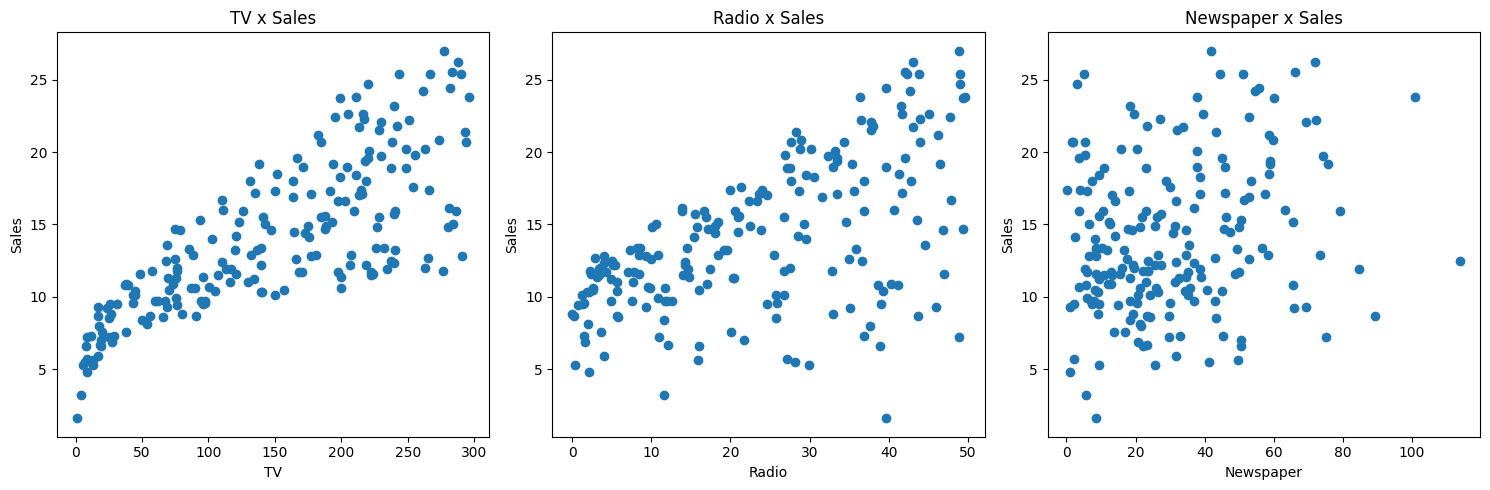

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(df['TV'], df['sales'])
axes[0].set_xlabel('TV')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV x Sales')

axes[1].scatter(df['radio'], df['sales'])
axes[1].set_xlabel('Radio')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio x Sales')

axes[2].scatter(df['newspaper'], df['sales'])
axes[2].set_xlabel('Newspaper')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper x Sales')

plt.tight_layout()
plt.show()


#### c-) Calcule o coeficiente de correlação de Pearson para os três pares de variáveis: TV x sales, radio x sales e newspaper x sales.

In [6]:
correlation_tv_sales = df['TV'].corr(df['sales'])
correlation_radio_sales = df['radio'].corr(df['sales'])
correlation_newspaper_sales = df['newspaper'].corr(df['sales'])

print(f"Correlação TV x Sales: {correlation_tv_sales}")
print(f"Correlação Radio x Sales: {correlation_radio_sales}")
print(f"Correlação Newspaper x Sales: {correlation_newspaper_sales}")


Correlação TV x Sales: 0.7822244248616061
Correlação Radio x Sales: 0.5762225745710551
Correlação Newspaper x Sales: 0.22829902637616528


#### d-) Analisando os diagramas de dispersão acima e os valores dos coeficientes de correlação responda qual dos tipos de anúncios influencia mais e qual deles influencia menos nos resultados das vendas?

Respostas:Os anúncios em TV têm o maior impacto nas vendas, mostrando uma forte correlação positiva. Já os anúncios em jornal influenciam menos, com uma correlação mais fraca e dispersa.








## PARTE II: *dataset [Tips](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv)*

Este dataset mostra diferentes atributos (valor da conta, gorjeta, número de pessoas, etc.) dos clientes de um restaurante.

#### e-) Faça a leitura do dataset "tips" disponível na biblioteca seaborn.

In [9]:
tips = sns.load_dataset('tips')
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### f-) Mostre o diagrama de dispersão entre as variáveis "total_bill" e "tip" com a reta de regressão utilizando a função *polyfit* da biblioteca numpy.




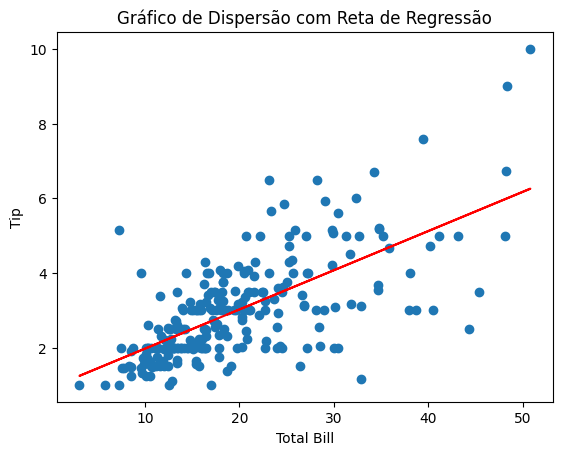

In [14]:
x = tips['total_bill']
y = tips['tip']

coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
y_pred = polynomial(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Gráfico de Dispersão com Reta de Regressão')

plt.show()


#### g-) Utilizando os coeficientes a e b da reta de regressão, calcule qual será a gorjeta (tip) estimada para uma conta total (total_bill) igual a um valor fornecido pelos usuário.

In [17]:
total_bill_input = float(input("Digite o valor da conta total: "))
gorjeta_estimated = coefficients[0] * total_bill_input + coefficients[1]
print(f"A gorjeta estimada para uma conta de {total_bill_input} é: {gorjeta_estimated}")


Digite o valor da conta total: 30
A gorjeta estimada para uma conta de 30.0 é: 4.071005135085274


#### h-) Faça o mesmo para estimar o valor total da conta (total_bill) para um valor de gorjeta (tip) fornecido pelo usuário?

In [19]:
gorjeta_input = float(input("Digite o valor da gorjeta: "))
# Ajusta o modelo de regressão linear com a gorjeta (tip) como variável independente e total_bill como variável dependente
coefficients_reversed = np.polyfit(y, x, 1)
polynomial_reversed = np.poly1d(coefficients_reversed)
total_bill_estimated = coefficients_reversed[0] * gorjeta_input + coefficients_reversed[1]

print(f"O valor total da conta estimado para uma gorjeta de {gorjeta_input} é: {total_bill_estimated}")


Digite o valor da gorjeta: 4.071005135085274
O valor total da conta estimado para uma gorjeta de 4.071005135085274 é: 24.449850635259153


#### i-) Calcule o coeficiente de correlação de Pearson para total_bill e tip.

In [20]:
correlation_total_bill_tip = tips['total_bill'].corr(tips['tip'])

print(f"Correlação Total Bill x Tip: {correlation_total_bill_tip}")


Correlação Total Bill x Tip: 0.6757341092113641


#### j-) Responda:

i-) Existe correlação entre 'total_bill' e 'tip'? Resp:Sim, existe correlação.

ii-) Se sim, a correlação é positiva ou negativa? Resp:A correlação é positiva, já que o valor é maior que 0.

iii-) Se sim, qual o grau de correlação? Forte, moderada ou fraca? Resp:A correlação é moderada, pois está entre 0.5 e 0.7.

## PARTE III: *dataset [Atlas Brasil](https://raw.githubusercontent.com/malegopc/DSBD/main/Datasets/Atlas/Atlas_Brasil_2014.csv)*

Este dataset mostra diferentes atributos valores de variáveis sociais para cada um dos estados brasileiros:

* ANOSEST = Média de anos de estudo
* T_ANALF25M = Taxa de analfabetismo - 25 anos ou mais
* MORT1 =	Mortalidade infantil
* RDPC = Renda per capita
* POPTOT = População total
* IDHM = IDHM

#### k-) Ler o dataset "*Atlas/Atlas_Brasil_2014.csv*" como dataframe utilizando a biblioteca Pandas

In [33]:
!wget https://raw.githubusercontent.com/malegopc/DSBD/main/Datasets/Atlas/Atlas_Brasil_2014.csv
df_atlas = pd.read_csv('Atlas_Brasil_2014.csv')
print(df_atlas.head())


--2024-10-01 18:04:02--  https://raw.githubusercontent.com/malegopc/DSBD/main/Datasets/Atlas/Atlas_Brasil_2014.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1157 (1.1K) [text/plain]
Saving to: ‘Atlas_Brasil_2014.csv’

Atlas_Brasil_2014.c 100%[===================>]   1.13K  --.-KB/s    in 0s      

2024-10-01 18:04:02 (44.5 MB/s) - ‘Atlas_Brasil_2014.csv’ saved [1157/1157]

  ESTADO  MORT1  ANOSEST  T_ANALF25M    RDPC     POPT   IDHM
0     RO  20.82     8.31       10.66  667.41  1641072  0.715
1     AC  18.37     7.95       17.19  548.24   762502  0.719
2     AM  19.38     9.21        8.06  579.45  3769444  0.709
3     RR  17.57     9.29        9.95  665.19   472758  0.732
4     PA  17.65     7.78       12.81  469.47  7615746  0.675


#### l-) Utilizando a função "[pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)" da biblioteca seaborn mostre os diagramas de dispersão com suas respectivas retas de regressão entre todos os pares de variáveis.

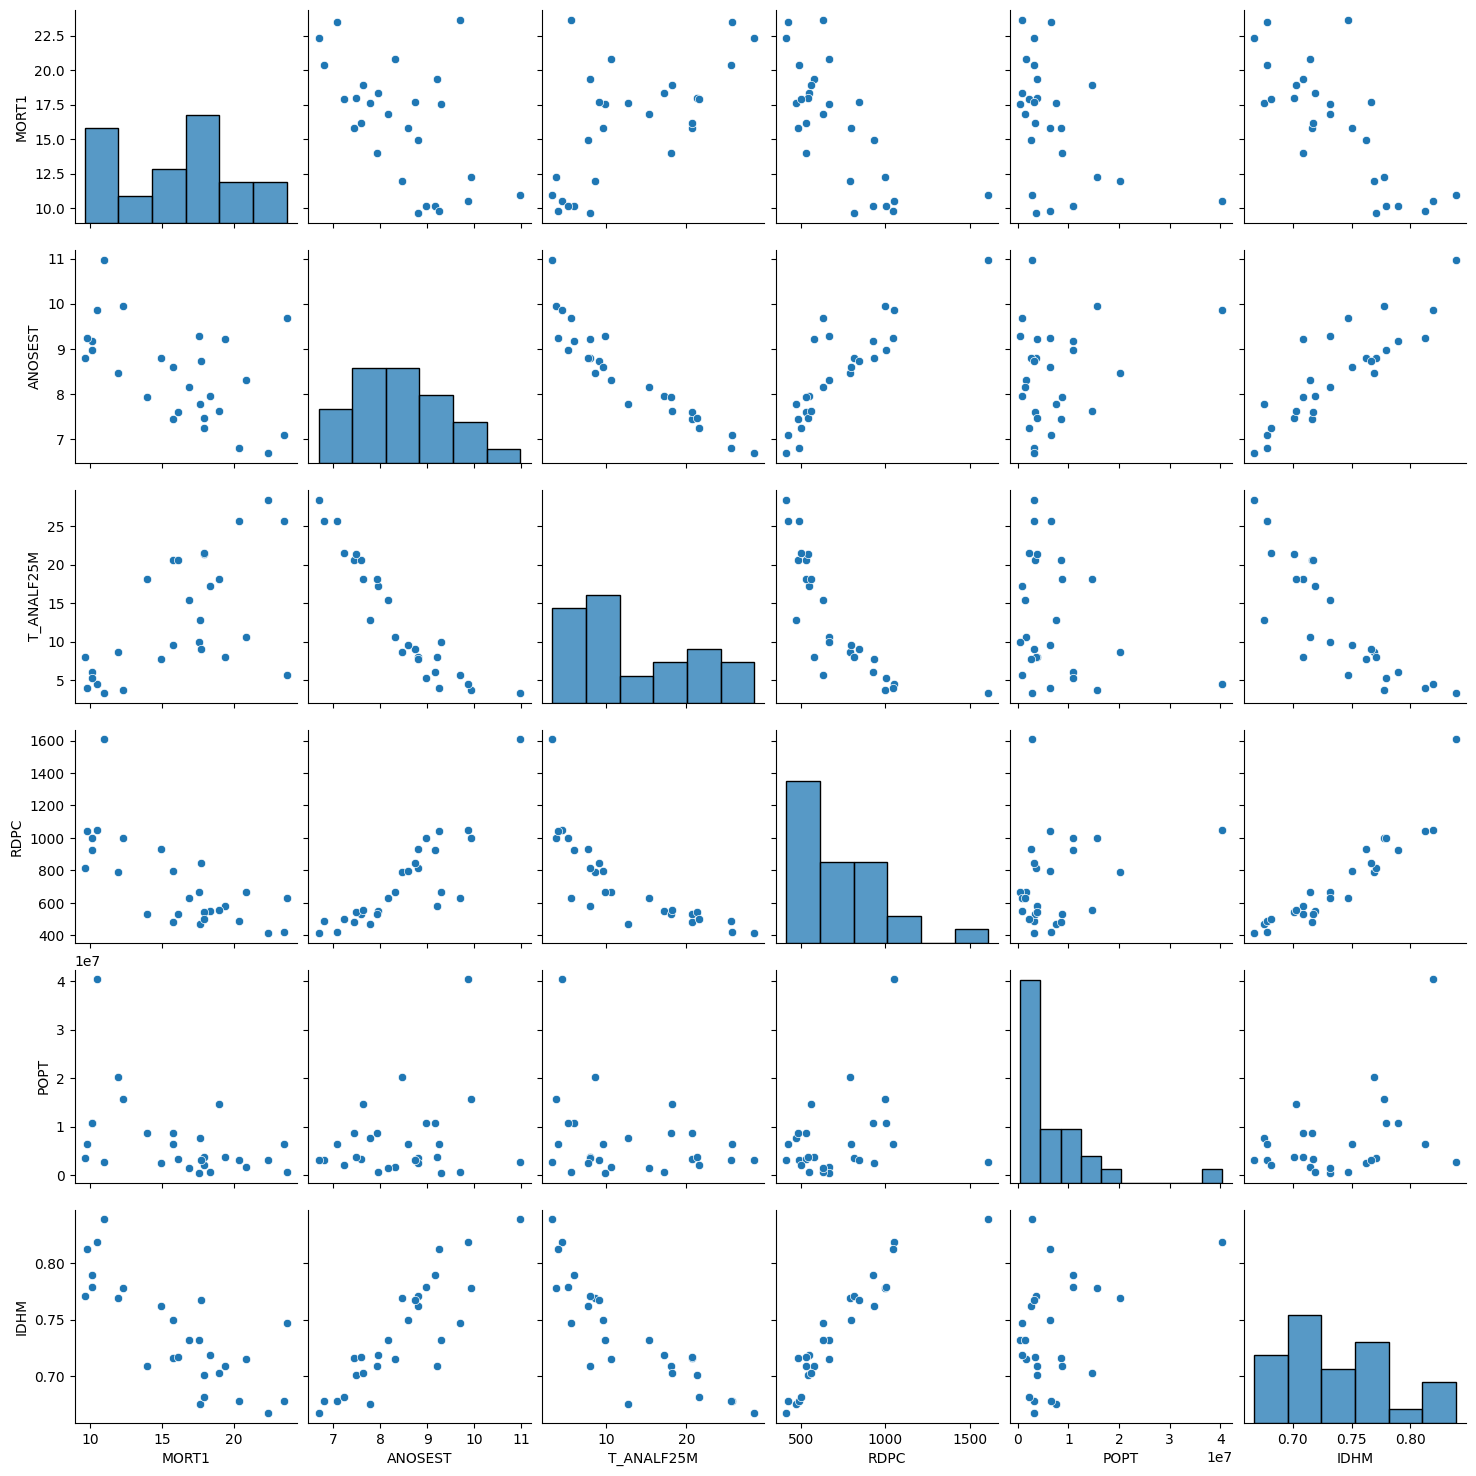

In [34]:
sns.pairplot(df_atlas)
plt.show()



#### m-) Obtenha a matriz de correlação entre todos os pares de variáveis.

In [35]:
df_atlas['ESTADO'] = pd.Categorical(df_atlas['ESTADO'])
corrMatrix = df_atlas.corr(numeric_only=True)
print(corrMatrix)



               MORT1   ANOSEST  T_ANALF25M      RDPC      POPT      IDHM
MORT1       1.000000 -0.549384    0.619011 -0.716724 -0.460198 -0.784082
ANOSEST    -0.549384  1.000000   -0.927319  0.849124  0.248012  0.864724
T_ANALF25M  0.619011 -0.927319    1.000000 -0.786432 -0.281324 -0.849097
RDPC       -0.716724  0.849124   -0.786432  1.000000  0.275724  0.928775
POPT       -0.460198  0.248012   -0.281324  0.275724  1.000000  0.389949
IDHM       -0.784082  0.864724   -0.849097  0.928775  0.389949  1.000000


#### n-) Mostre um "mapa de calor" (heatmap) baseado na matriz de correlação entre todos os pares de variáveis.

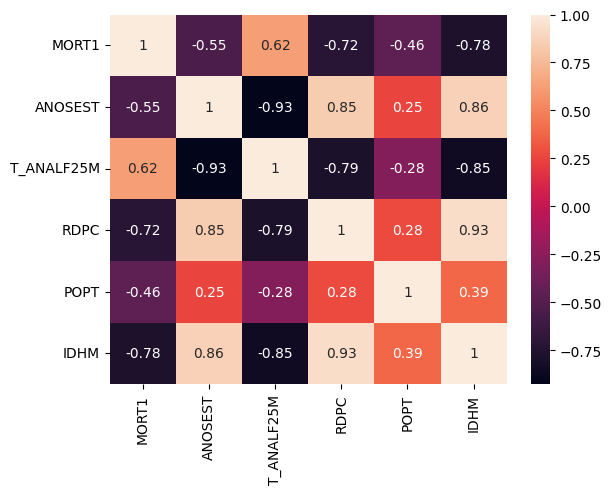

In [36]:
df_atlas['ESTADO'] = pd.Categorical(df_atlas['ESTADO'])
corrMatrix = df_atlas.corr(numeric_only=True)
sns.heatmap(corrMatrix, annot=True)
plt.show()


#### o-) Analisando os resultados acima, responda:

i-) Quais pares de variáveis são correlacionadas positivamente? Resp:ANOSEST x RDPC (0.85)
ANOSEST x IDHM (0.86)
RDPC x IDHM (0.93)
POPT x RDPC (0.28)
POPT x IDHM (0.39)
POPT x ANOSEST (0.25)

ii-) Quais pares de variáveis são correlacionadas negativamente? Resp:MORT1 x ANOSEST (-0.55)
MORT1 x T_ANALF25M (-0.62)
MORT1 x RDPC (-0.72)
MORT1 x POPT (-0.46)
MORT1 x IDHM (-0.78)
ANOSEST x T_ANALF25M (-0.93)
T_ANALF25M x RDPC (-0.79)
T_ANALF25M x POPT (-0.28)
T_ANALF25M x IDHM (-0.85)

iii-) Qual par de variáveis apresenta maior correlação (positiva e negativa)( desconsidere pares com as mesmas variáveis)? Resp:Maior correlação positiva: RDPC x IDHM (0.93)
Maior correlação negativa: ANOSEST x T_ANALF25M (-0.93)